# Fertility rate & cost of living 


## Introduction
Previously, I have been seeing a lot of news and articles indicating that South Korea has one of the lowest total fertility rates in the world(Bae & Yeung, 2022). This news and articles pointed out the high living cost as one of the reasons for this result. So, a question rose to me, whether all the countries with high living expenses have low fertility rates and whether the fertility rate correlates to living expenses.


## Background 

The fertility rate worldwide has been decreasing. Over the last 70 years, the fertility rate decreased by 50% worldwide (Alvarez,2022). Until 1965, a woman in the world has given birth to five children or more. From then the fertility rate started to decrease(Alvarez,2022). Now the average woman in the world gives birth to less than three children. According to Alvarez(2022), the reasons for the decrease in the fertility rate are:
<ul>
    <li>Women’s empowerment, particularly in education and the workforce</li>
    <li>Lower child mortality</li>
    <li>Increased cost to raising children</li>
</ul>

The worst case of the decline in the fertility rate is South Korea. Since the year 2015, the birth rate in the country has been dropping dramatically(Bae & Yeung, 2022). This came to the current state, where the country has a higher death rate than the birth rate(Mao,2022). Experts cited higher living costs, a spike in house costs and the effect of the Covid Pandemic had led to discouragement of having children (Mao,2022).


Birth rate and fertility are two different measurements.
<ul>
    <li>Birth Rate - Total number of births in a year per 1,000 individuals.</li>
    <li>Fertility Rate - Total number of children that would be born  to a woman of reproductive age in a population in a year per 1,000 women .</li>
</ul>

## Aim and Objectives

<h4>Aim:</h4> 
        The main aim of this research is to find whether all the countries with high living indexes have low fertility rates and whether fertility rates correlate to living expenses.

<h4>Objectives:</h4> 
    <ul>
        <li>Determine whether all the countries with a high cost of living have a low fertility rate</li>
        <li>Determine whether fertility rate and living expenses correlate with each other </li>
        <li>Find the countries that meet the baseline of the high cost of living</li>
        <li>Compare the countries with high living expenses and their fertility rate to the average fertility rate yearly (2015-2020)</li>
        <li>Plot graphs to show the difference between the country's fertility rate and the average fertility rate </li> 
    </ul> 
    
    
#### Hypothesis 
<ol>
    <li>All the countries with a high cost of living have a low fertility rate</li>
    <li>Fertility rate and living expenses correlate with each other</li>
</ol>


## Data
For this research two datasets are going to be used. One dataset consists of the cost of living index around the world. The other dataset consists of fertility rates by country. For this project, I would focus on the specific period from 2015 to 2020. 

#### Data Source
<ol>
    <li>Cost of Living Index by Country - retrieved from : https://www.numbeo.com/cost-of-living/rankings_by_country.jsp</li>
    <li>Fertility rates - retrieved from : https://data.oecd.org/pop/fertility-rates.htm</li>
</ol>
    
#### Ethics of use of data 
<ul>
    <li>Data source(1): From https://www.numbeo.com. The website's Term of use states 'Use of Numbeo data is free for personal use' </li>
    <li>Data source(2): From https://data.oecd.org/. The website's Terms and Conditions stated 'The OECD encourages the use of its data' </li>
</ul>   


In [1]:
# installing packages required
from bs4 import *
import urllib3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

### Web scraping - To retrieve the dataset for cost of living by country (2015~2020)

Data about cost of living is web scraped from Data Source[1]. 

The table on the website does not include year column, so a column is added to store which year the data is from. Another column called 'ranking' is added, it would store the actual position of the row in the table since the rank column is scraped as nothing. 

In [2]:
#web scraping cost of living dataset
data=[]
years = np.arange(2015, 2021, 1)
for year in years:
    url ="https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title="+str(year)
    http=urllib3.PoolManager()
    response=http.request('GET',url)
    soup=BeautifulSoup(response.data,"lxml")
    table_body=soup.find("tbody")
    ranking=0
    for row in table_body.find_all("tr"): 
        col=row.find_all("td")
        col=[ele.text.strip() for ele in col]
        ranking+=1
        col.append(year)
        col.append(ranking)
        data.append(col)

        # web scraping table headers
headers=[]
table=soup.find('table',{'id':"t2"})
for x in table.find_all("tr"):
    for y in x.find_all("th"):
        headers.append(y.text)
headers.append("Year")
headers.append("Ranking")

#Creating datafram of living_expenses 
cost_of_living=pd.DataFrame(data,columns=headers)

# To show how the dataframe looks like 
cost_of_living.head(3)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Year,Ranking
0,,Switzerland,126.0,57.6,92.6,128.4,127.6,146.5,2015,1
1,,Norway,118.6,48.7,84.4,110.1,141.5,96.3,2015,2
2,,Venezuela,111.0,34.1,73.4,128.4,91.1,11.9,2015,3


In [3]:
# To get details of the dataframe
cost_of_living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            728 non-null    object
 1   Country                         728 non-null    object
 2   Cost of Living Index            728 non-null    object
 3   Rent Index                      728 non-null    object
 4   Cost of Living Plus Rent Index  728 non-null    object
 5   Groceries Index                 728 non-null    object
 6   Restaurant Price Index          728 non-null    object
 7   Local Purchasing Power Index    728 non-null    object
 8   Year                            728 non-null    int64 
 9   Ranking                         728 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 57.0+ KB


### Reading csv file -  To retrieve the dataset for fertility rate by country  

The data of fertility rate by country is downloaded from Data Source[2] as a csv file. These data are then stored in a dataframe for future use. 

In [5]:
#Store data to dataframe 
fertility_rate = pd.read_csv('children-per-woman-UN.csv')
fertility_rate.head(5)

,Entity,Code,Year,Fertility rate - Sex: all - Age: all - Variant: estimates
0,Afghanistan,AFG,1950,7.2484
1,Afghanistan,AFG,1951,7.2596
2,Afghanistan,AFG,1952,7.2601
3,Afghanistan,AFG,1953,7.2662
4,Afghanistan,AFG,1954,7.2542


In [6]:
#Get details of the dataframe
fertility_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18360 entries, 0 to 18359
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     18360 non-null  object 
 1   Code                                                       17064 non-null  object 
 2   Year                                                       18360 non-null  int64  
 3   Fertility rate - Sex: all - Age: all - Variant: estimates  18360 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 573.9+ KB


In [7]:
fertility_rate.describe()

,Year,Fertility rate - Sex: all - Age: all - Variant: estimates
count,18360.000000,18360.000000
mean,1985.500000,4.015418
std,20.783171,2.000740
min,1950.000000,0.745500
25%,1967.750000,2.174350
50%,1985.500000,3.619250
75%,2003.250000,5.925125
max,2021.000000,8.863700


### Data cleaning for dataset1 (living_expenses)

In [8]:
# The rank column displays nothing, so the ranking column would replace the rank column 
cost_of_living.Rank = cost_of_living.Ranking

# deleting all the rows that are not required
delelist=['Rent Index','Cost of Living Plus Rent Index','Groceries Index','Restaurant Price Index','Local Purchasing Power Index']
for x in delelist: 
     cost_of_living.drop(x, inplace=True, axis=1)

#rearranging the dataframe sequence
sequence = ['Rank','Country', 'Cost of Living Index','Year']
cost_of_living = cost_of_living.reindex(columns=sequence)

# droping any row that has NaN 
cost_of_living.dropna(inplace = True)
cost_of_living

,Rank,Country,Cost of Living Index,Year
0,1,Switzerland,126.0,2015
1,2,Norway,118.6,2015
2,3,Venezuela,111.0,2015
3,4,Iceland,102.1,2015
4,5,Denmark,100.6,2015
...,...,...,...,...
723,128,Uzbekistan,26.0,2020
724,129,Syria,25.3,2020
725,130,India,24.6,2020
726,131,Afghanistan,24.2,2020


### Data cleaning for dataset2 (fertility_rate)

In [10]:
#changing the column name from Entity to country 
fertility_rate.rename(columns={'Entity':'Country','Fertility rate - Sex: all - Age: all - Variant: estimates':'Fertility rate'}, inplace = True)

# droping all the data that are not in the period of 2015 and 2020 
fertility_rate.drop(fertility_rate[fertility_rate['Year']<2015].index, inplace = True)
fertility_rate.drop(fertility_rate[fertility_rate['Year']>2020].index, inplace = True)

# Creating dataframe for data of continents
# Antartica is excluded as it is not habitat of humans 
options = ['Asia', 'Africa', 'Northern America', 'Latin America and the Caribbean', 'Oceania', 'Europe']
continent_df=pd.DataFrame(fertility_rate[fertility_rate['Country'].isin(options)])
continent_df = continent_df.drop('Code', axis=1)

# Deleting all the data where column 'Code' contains nothing as it is not a data of a country
fertility_rate = fertility_rate.dropna(subset=['Code'])

In [11]:
fertility_rate.head(5)

,Country,Code,Year,Fertility rate
65,Afghanistan,AFG,2015,5.4052
66,Afghanistan,AFG,2016,5.2618
67,Afghanistan,AFG,2017,5.1290
68,Afghanistan,AFG,2018,5.0023
69,Afghanistan,AFG,2019,4.8701


## Analyse data for hypothesis 1 

A new dataframe is created, it would store the data of countries that were in the top 20 of cost of living each year. It is done by setting a condition to the Rank column in cost of living dataframe, which is smaller than 21.In total there will be 120 data in the dataframe.

In [12]:
top_20=pd.DataFrame(cost_of_living[cost_of_living['Rank']<21])
top_20['Cost of Living Index']=pd.to_numeric(top_20['Cost of Living Index'])
display(top_20)

,Rank,Country,Cost of Living Index,Year
0,1,Switzerland,126.0,2015
1,2,Norway,118.6,2015
2,3,Venezuela,111.0,2015
3,4,Iceland,102.1,2015
4,5,Denmark,100.6,2015
...,...,...,...,...
611,16,Australia,73.5,2020
612,17,New Zealand,72.5,2020
613,18,Belgium,71.8,2020
614,19,Seychelles,71.6,2020


The baseline of the high cost of living country is set. The countries that were in the top 20 of the high cost of living yearly from 2015 to 2020 and they were in the top 20 ranked at least 5 times.

In [13]:
freq_table = top_20.Country.value_counts().reset_index()
freq_table.rename(columns={'Country':'Count','index':'Country'}, inplace = True)
display(freq_table)

,Country,Count
0,Switzerland,6
1,Luxembourg,6
2,Norway,6
3,Iceland,6
4,Denmark,6
5,Australia,6
6,New Zealand,6
7,Belgium,6
8,Ireland,6
9,France,5


In [14]:
freq_table=freq_table[freq_table['Count']>4]
display(freq_table)

,Country,Count
0,Switzerland,6
1,Luxembourg,6
2,Norway,6
3,Iceland,6
4,Denmark,6
5,Australia,6
6,New Zealand,6
7,Belgium,6
8,Ireland,6
9,France,5


These 16 countries shown above are the countries that met the baseline of the high cost of living. The countries that were in the top 20 of the high cost of living yearly from 2015 to 2020 at least 5 times. 


A high_df dataframe is created by merging freq_table, fertility_rate, and cost_of_living dataframes based on the column Country for future use. This dataframe is to store both of fertility rate and the cost of living index of countries.

In [15]:
high_df =pd.merge(pd.merge(freq_table, fertility_rate,on='Country'),cost_of_living,on=['Country','Year'])

high_df = high_df.drop('Rank', axis=1)
high_df = high_df.drop('Code', axis=1)
high_df['Cost of Living Index'] = high_df['Cost of Living Index'].astype(float)
 
print(high_df.to_markdown())

|    | Country     |   Count |   Year |   Fertility rate |   Cost of Living Index |
|---:|:------------|--------:|-------:|-----------------:|-----------------------:|
|  0 | Switzerland |       6 |   2015 |           1.5417 |                  126   |
|  1 | Switzerland |       6 |   2016 |           1.5428 |                  123.1 |
|  2 | Switzerland |       6 |   2017 |           1.521  |                  122.1 |
|  3 | Switzerland |       6 |   2018 |           1.5149 |                  131.4 |
|  4 | Switzerland |       6 |   2019 |           1.4875 |                  121.2 |
|  5 | Switzerland |       6 |   2020 |           1.4917 |                  122.4 |
|  6 | Luxembourg  |       6 |   2015 |           1.4642 |                   91.8 |
|  7 | Luxembourg  |       6 |   2016 |           1.414  |                   82   |
|  8 | Luxembourg  |       6 |   2017 |           1.3939 |                   77.3 |
|  9 | Luxembourg  |       6 |   2018 |           1.381  |                  

A bar graph is to be drawn with the data in the high_df dataframe. The bar graph drawn would show the fertility rate of countries in that specific year with an average line to show the average fertility rate of that year. Allows to compare the average fertility rate and the country's fertility rate for that year. 

2.670492827004219

2.634531223628692

2.5877392405063295

2.5496691983122366

2.5160729957805907

2.4827194092827005

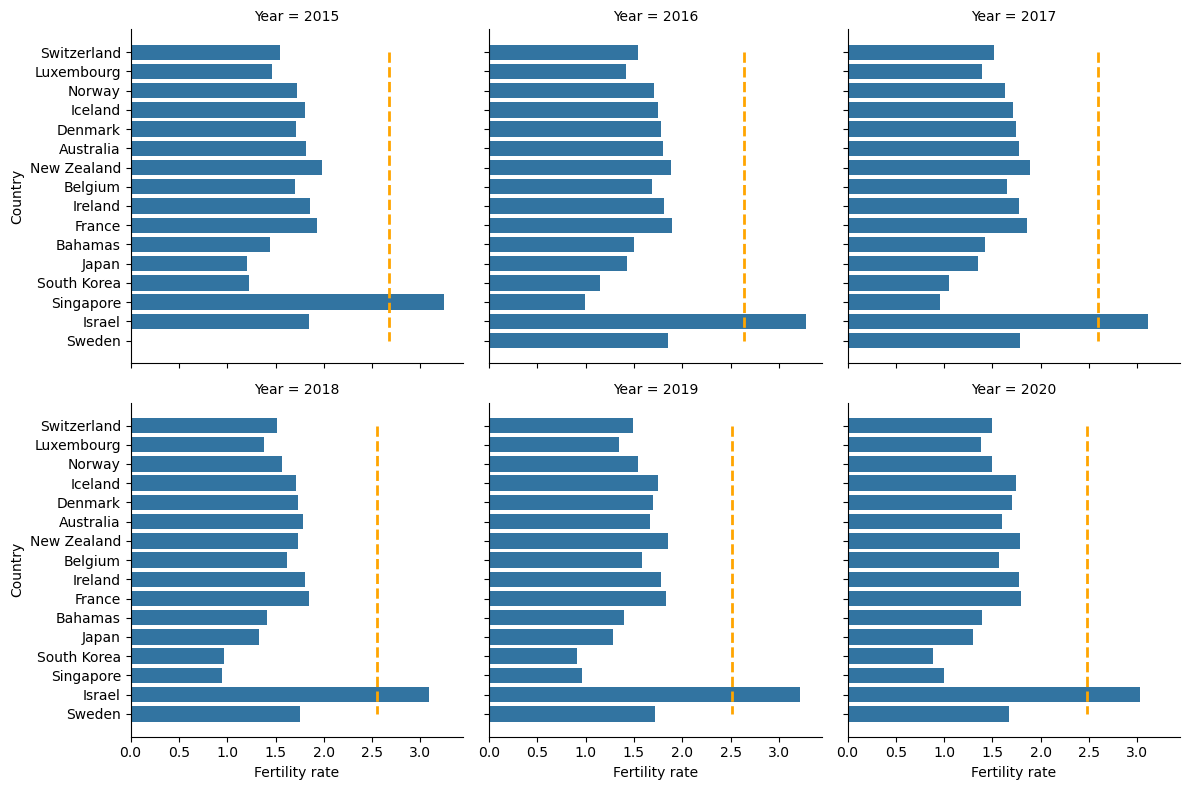

In [16]:
# drawing barplot
g = sns.FacetGrid(high_df, col="Year",height=4, aspect=1,col_wrap=3)
g.map_dataframe(sns.barplot, x="Fertility rate",y="Country")

#ploting average line 
for m,ax in zip(fertility_rate.groupby('Year')['Fertility rate'].mean(), g.axes.ravel()):
    ax.vlines(m, 0, 15,color='orange',linestyles='dashed',lw=2,label=m)
    display(m)
plt.show()

The graph above is to show the countries with a high cost of living and their fertility rate compared to the average fertility rate of the world in that year.

The first hypothesis of this project was, all the countries with a high cost of living have low fertility rates. Most of the countries with a high cost of living had fertility rates lower than the average fertility rate. However, Israel had high fertility rate than the average fertility rate even though the cost of living is high. If Israel is given an exception the hypothesis is to be true. But as the hypothesis indicates ALL the countries with a high cost of living, and not all of the 16 countries had low fertility rates. Therefore, the first hypothesis is false.

The country Israel has a high fertility rate despite having a high cost of living, this indicates that the fertility rate has a stronger correlation to other factors other than the cost of living. As mentioned in the background,
<ul>
    <li>Women’s empowerment, particularly in education and the workforce</li>
    <li>Lower child mortality</li>
    <li>Increased cost to raising children</li>
</ul>
These factors may be the factors that have a stronger correlation to the fertility rate.

For further review, the same bar chart is plotted for countries with low cost of living. All the steps done are exactly the same as the bar graph for the high cost of living countries. The only change made was instead of countries in the top 20 of the high cost of living, the countries that were not in the top 100 were selected. Then the countries that met the baseline of the low cost of living have been used for plotting bar graphs.

As the hypothesis is that all the countries with a high cost of living have low fertility rates, based on this, the countries with a low cost of living should have high fertility rates. To see whether or not these low living expenses countries really have high fertility rates the following bar graph is drawn.  

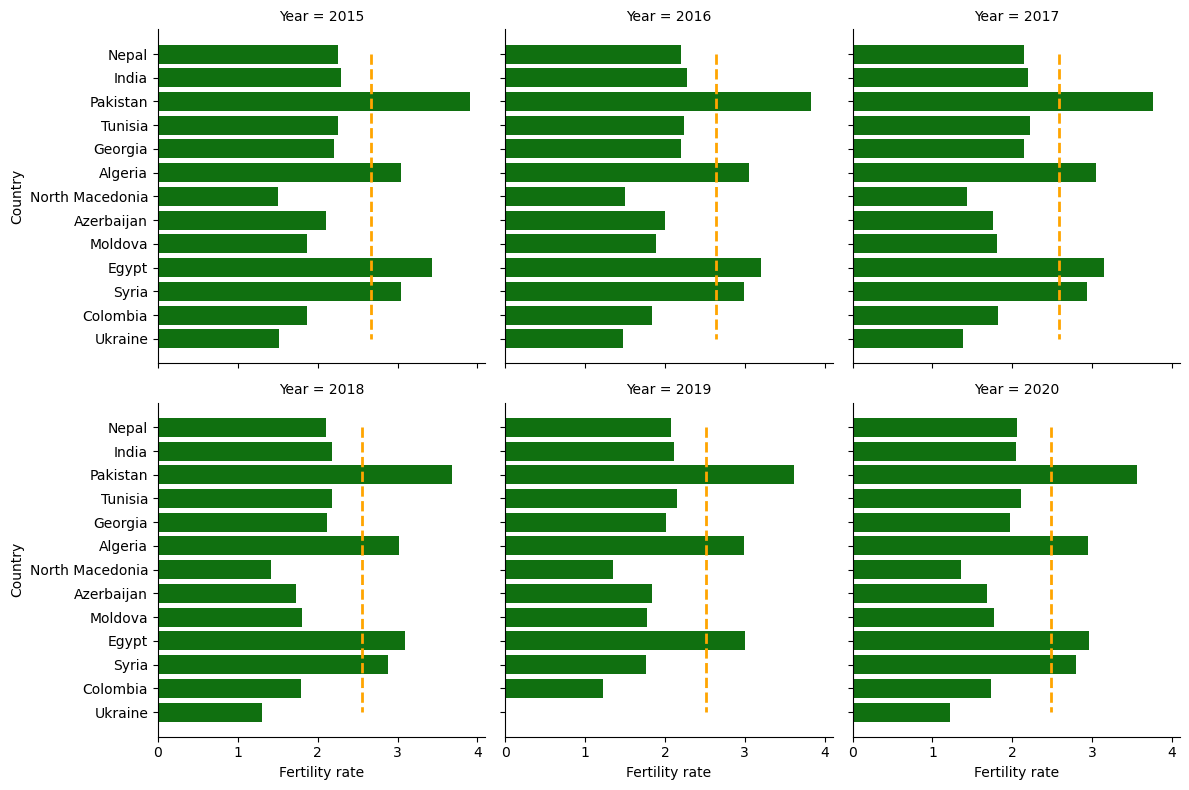

In [17]:
#creating dataframe for data of countries with low cost of living.Countries that are not in top 100 of high cost of living 
low_costofliving=pd.DataFrame(cost_of_living[cost_of_living['Rank']>100])
#frequency table created for low_costofliving dataframe
freq_table_low= low_costofliving.Country.value_counts().reset_index()
freq_table_low.rename(columns={'Country':'Count','index':'Country'}, inplace = True)

#getting the countries that had not been in top 100 of high cost of living yearly from 2015 to 2020
freq_table_low=freq_table_low[freq_table_low['Count']>4]
#merging freq_table_low with fertility rate and cost of living dataframes
low_df =pd.merge(pd.merge(freq_table_low, fertility_rate,on='Country'),cost_of_living,on=['Country','Year'])

# drawing barplot
g = sns.FacetGrid(low_df, col="Year",height=4, aspect=1,col_wrap=3)
g.map_dataframe(sns.barplot, x="Fertility rate",y="Country",color='green')
#ploting average line 
for m,ax in zip(fertility_rate.groupby('Year')['Fertility rate'].mean(), g.axes.ravel()):
    ax.vlines(m, 0, 12,color='orange',linestyles='dashed',lw=2,label=m)
plt.show()


According to the hypothesis, all the countries with a high cost of living have low fertility rates so the countries with a low cost of living should have high fertility rates. But as the graph shows, the countries of low living exppenses do not have high fertility rate than the average fertility rate. This gives more support to the side that the hypothesis is false. 

## Analyse data for hypothesis 2

The second hypothesis is, fertility rate and living expenses correlate with each other

In [18]:
total_df =pd.merge(cost_of_living, fertility_rate,on=['Country','Year'])
total_df = total_df.reindex(columns=['Rank','Year','Country','Code', 'Cost of Living Index', 'Fertility rate'])
total_df['Rank'] = total_df['Rank'].apply(str)
total_df['Cost of Living Index'] =total_df ['Cost of Living Index'].astype(float)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 705 entries, 0 to 704
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  705 non-null    object 
 1   Year                  705 non-null    int64  
 2   Country               705 non-null    object 
 3   Code                  705 non-null    object 
 4   Cost of Living Index  705 non-null    float64
 5   Fertility rate        705 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 38.6+ KB


In [19]:
display(total_df.corr())

/var/folders/kj/q2sksvq90yvf43l2qw13x0x80000gn/T/ipykernel_77280/1640199741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(total_df.corr())


,Year,Cost of Living Index,Fertility rate
Year,1.000000,-0.148131,-0.048277
Cost of Living Index,-0.148131,1.000000,-0.316545
Fertility rate,-0.048277,-0.316545,1.000000


/var/folders/kj/q2sksvq90yvf43l2qw13x0x80000gn/T/ipykernel_77280/731631696.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_df.corr(),annot = True, cmap= 'coolwarm')


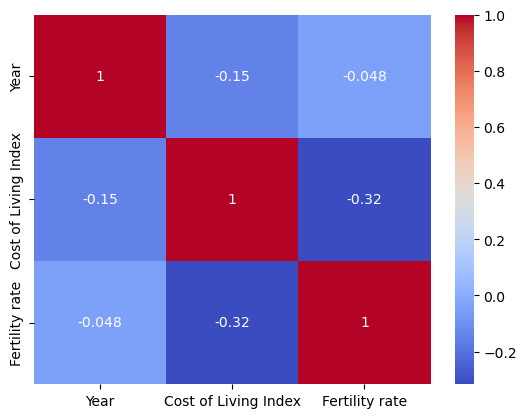

In [20]:
sns.heatmap(total_df.corr(),annot = True, cmap= 'coolwarm')
plt.show()

The second hypothesis was that the fertility rate has a correlation to the cost of living.  According to the heatmap above, the Fertility rate has a correlation of -0.32 with Life expectancy. The value -0.32 is not considered a strong negative correlation. Hence, this concludes that their Fertility rate correlates to the cost of living, but the correlation is not strong. 

## Conclusion: 

The first hypothesis is concluded to be false. The countries with a high cost of living are most likely to have low fertility rates but not all countries have low fertility rates. The country Israel had a high fertility rate despite having a high cost of living.

The second hypothesis is proven true. Fertility rate and living expenses have a correlation with each other. They have a negative correlation with each other, as the living expenses increase the fertility rate decreases.

## References: 

Bae, G. and Yeung, J. (2022) South Korea Records world's lowest fertility rate -- again, CNN. Cable News Network. Retrieved from: https://edition.cnn.com/2022/08/26/asia/south-korea-worlds-lowest-fertility-rate-intl-hnk/index.html .
<br>
<br>
Max Roser (2014) - "Fertility Rate". Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/fertility-rate' [Online Resource]
<br>
<br>
Cost of Living Index by Country 2022 Mid-Year. (n.d.). Retrieved from: https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?
<br>
<br>
seaborn.FacetGrid — seaborn 0.12.1 documentation. (n.d.).Retrieved from:  https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
<br>
<br>
pandas. (n.d.). DataFrame — pandas 1.4.3 documentation. Retrieved from :https://pandas.pydata.org/docs/reference/frame.html
<br>
<br>
GeeksforGeeks. (2020, February 29). Pandas Tutorial. Retrieved from: https://www.geeksforgeeks.org/pandas-tutorial/?ref=lbp
<br>
<br>
Mao, B. F. (2022, August 25). South Korea records world’s lowest fertility rate again. BBC News. Retrieved from: https://www.bbc.com/news/world-asia-62670717
<br>
<br>
Alvarez, P. (2022, June 17) What does the global decline of the fertility rate look like?, World Economic Forum. Retrieved from: https://www.weforum.org/agenda/2022/06/global-decline-of-fertility-rates-visualised/#:~:text=For%20the%20last%2070%20years,increased%20cost%20of%20raising%20children.

 

In [21]:
conda list -e > requirements.txt


Note: you may need to restart the kernel to use updated packages.
